In [59]:
"""
@author
"""

#Skip this section to see AI code in the next section.
import os
import time
import shutil 
import pandas as pd
from shutil import copyfile
from functools import reduce
import glob

pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)


allFilesPath = "/Users/pawankumar/Desktop/temp/Clemson/MDM/smallDataSet/*txt"
#"/Users/pawankumar/Desktop/temp/Clemson/MDM/Africa Dataset/files/*.txt"
inputPath = '/Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles'
mergedPath = '/Users/pawankumar/Desktop/temp/Clemson/MDM/output/merged'

# Clearing the input directory
shutil.rmtree(inputPath)
os.makedirs(inputPath)

# Identifying Files with < 10% missing values. 
print('****Start: Selected Files ****')

for fn in glob.glob(allFilesPath):
    df = pd.read_csv(fn, comment="#", sep=';', index_col=0, usecols=[0,2], na_values=["-999"], parse_dates=True)[' Value']
    na_count = df.isna().sum()
    records = df.count()
    ratio = na_count/(records) if records != 0 else 0
    if (ratio*100) < 10.00:
        print((ratio*100),'% for '+shutil.copy(fn, inputPath))
        
print('****End: Selected Files ****')
        



# os.chdir(r'/Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles')

# dfs = [
#     pd.read_csv(csv_file, sep=';',comment='#',usecols = ['YYYY-MM-DD','Value ']) for csv_file in
#     [f for f in os.listdir() if os.path.splitext(f)[1] == '.txt' ]
                                                        
# ]




****Start: Selected Files ****
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101460_Q_Day.Cmd.txt
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101901_Q_Day.Cmd.txt
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101250_Q_Day.Cmd.txt
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101300_Q_Day.Cmd.txt
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101550_Q_Day.Cmd.txt
0.005710370031978072 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101400_Q_Day.Cmd.txt
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101450_Q_Day.Cmd.txt
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101500_Q_Day.Cmd.txt
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101560_Q_Day.Cmd.txt
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101200_Q_Day.Cmd.txt
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/MDM/IFiles/4101451_Q_Day.Cmd.txt
0.0 % for /Users/pawankumar/Desktop/temp/Clemson/M

,YYYY-MM-DD,Value_x,Value_y,Value_x,Value_y,Value_x,Value_y,Value_x,Value_y,Value_x,Value_y,Value_x,Value_y,Value
0,1965-07-22,NaN,857.999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1965-07-23,NaN,753.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1965-07-24,NaN,682.435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1965-07-25,NaN,781.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1965-07-26,NaN,611.643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19651,2019-05-11,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,41.343,NaN,NaN,NaN
19652,2019-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.049,NaN,NaN,NaN
19653,2019-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.473,NaN,NaN,NaN
19654,2019-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.198,NaN,NaN,NaN


In [2]:
import os
import time
import shutil 
import pandas as pd
from shutil import copyfile
from functools import reduce
import glob

path = r'/home/nhumair/CPSC8810-Mining-Massive-Data/Models/Untitled_Folder' # use your path
all_files = glob.glob(path + "/*.txt")

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, skipinitialspace=True, comment="#", sep=';', index_col=0, usecols=[0,2], na_values=["-999"], parse_dates=True)
    dfs.append(df)

#Replace missing Values(-999.000) by mean
#Alternative Algo: SimpleFill, KNN, SoftImput, IterativeSVD, MatrixFactorization, NuclearNormMinimiation, Biscaler


#Merge Tables based on Date column
merged = reduce(lambda left, right: pd.merge_ordered(left, right, on='YYYY-MM-DD',how='outer'), dfs)


#delete hh:mm columns
#merged = merged.drop(merged.filter(regex='hh:mm').columns, axis=1)

#Final CSV
timestmp = time.strftime("%Y%m%d-%H%M%S")
#merged.to_csv(mergedPath+timestmp+'.csv', sep=';', index=False)
#print(mergedPath+'.csv')
merged.to_csv('merged_new'+'.csv', sep=';', index=False)


merged

,YYYY-MM-DD,Value_x,Value_y,Value_x,Value_y,Value
0,1966-01-01,1.0,NaN,NaN,NaN,NaN
1,1966-01-02,1.0,NaN,NaN,NaN,NaN
2,1966-01-03,2.0,NaN,NaN,NaN,NaN
3,1966-01-04,2.0,NaN,NaN,NaN,NaN
4,1966-01-05,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5594,1981-04-26,1.0,6.0,5.0,6.0,3.0
5595,1981-04-27,1.0,5.0,5.0,6.0,3.0
5596,1981-04-28,1.0,5.0,5.0,6.0,3.0
5597,1981-04-29,1.0,4.0,5.0,6.0,3.0


Populating the interactive namespace from numpy and matplotlib
Value_x
Value_y
Value_x.1
Value_y.1
Value
date


KeyError: "None of [Index(['x1', 'x2'], dtype='object')] are in the [columns]"

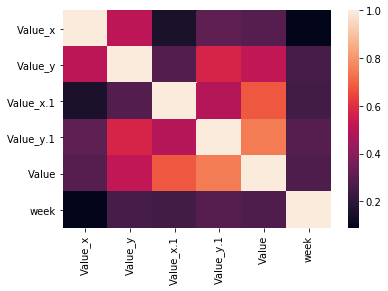

In [7]:
# AI Code to fill missing values


get_ipython().magic('pylab inline')
import pandas as pd
import numpy as np

#mergedPath = '/Users/pawankumar/Desktop/temp/Clemson/MDM/output/merged'
mergedPath='merged'
TodasEstaciones = pd.read_csv(mergedPath+'.csv',skipinitialspace=True, comment="#", sep=';', index_col=0, parse_dates=True)
#TodasEstaciones.loc['1977-01-01':'1977-01-07'].plot(subplots=True, figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')

import datetime
#we create a date column to extract the week number
TodasEstaciones['date']=TodasEstaciones.index
dates = TodasEstaciones['date'].values.tolist()
TodasEstaciones.head()
for col in TodasEstaciones.columns: 
    print(col) 
#apply a lambda function to the whole panda dataframe column
TodasEstaciones['week'] = TodasEstaciones['date'].apply(lambda x: x.isocalendar()[1])
#drop the date column because we dont need it
del TodasEstaciones['date']
#let see our dataframe
TodasEstaciones.head()

#creation of a correlation plot with seaborn
import seaborn as sns
corr = TodasEstaciones.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#Definition of training sets
#2017-01-01 to 2019-03-26
X_train = TodasEstaciones.loc['2017-01-01':'2018-01-01',['x1','x2']].astype(float32).values#,'week']] # Est 1, 3 and #week
y_train = TodasEstaciones.loc['2017-01-01':'2018-01-01','y1'].astype(float32).values # Est 2

#X_test = TodasEstaciones.loc['2018-01-02':'2019-03-26',['X1','X2']].astype(float32).values#,'week']] # Est 1, 3 and #week

# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation='linear', input_shape=(2,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=300,verbose=0)

y_pred = model.predict(X_train)



# plot(TodasEstaciones.loc['1977-01-01':'1977-01-07'].index,y_pred,label='Predicted')
# TodasEstaciones['Value_x'].loc['1977-01-01':'1977-01-07'].plot()
# figsize(12,8)
# ylim(0,40)
# legend(loc='best')

#Get the prediction for the train set
X_missing = TodasEstaciones.loc['2018-01-02':'2019-03-26',['x1','x2']].astype(float32).values

# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_missing)

# Scale the train set
X_missing = scaler.transform(X_missing)

y_missing = model.predict(X_missing)
print(len(y_missing))

y_missing = y_missing.reshape([449]).tolist()
TodasEstaciones['y1_Completed']=TodasEstaciones['y1']
TodasEstaciones['y1_Completed'].loc['2018-01-02':'2019-03-26']=y_missing

TodasEstaciones.loc['2018-01-02':'2019-03-26',['x1','x2','y1','y1_Completed']].plot(subplots=True, 
                                                   figsize=(15, 10)); plt.legend(loc='best')
xticks(rotation='vertical')
ylim(0,50)

TodasEstaciones
print(TodasEstaciones['y1_Completed'].loc['2018-01-02':'2019-03-26'])


DatetimeIndex(['1965-07-22', '1965-07-23', '1965-07-24', '1965-07-25',
               '1965-07-26', '1965-07-27', '1965-07-28', '1965-07-29',
               '1965-07-30', '1965-07-31',
               ...
               '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-11', '2019-05-12', '2019-05-13',
               '2019-05-14', '2019-05-15'],
              dtype='datetime64[ns]', length=19656, freq='D')


'\nax.plot(date_range, Qobs_origin, label="observation")\nax.plot(date_range, predicted, label="prediction")\nax.legend()\nax.set_title(f"Filling missing values from XXX to XXX")\nax.xaxis.set_tick_params(rotation=90)\nax.set_xlabel("Date")\n_ = ax.set_ylabel("Discharge (mm/d)")\nplt.show()\n'

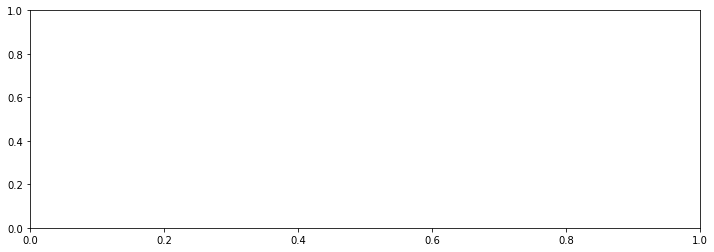

In [4]:
start_date = pd.to_datetime(dates[0], format="%Y-%m-%d")
end_date = pd.to_datetime(dates[len(dates)-2], format="%Y-%m-%d")
start_date = start_date
end_date = end_date + pd.DateOffset(days=1)
date_range = pd.date_range(start_date, end_date)
#print(date_range)
fig, ax = plt.subplots(figsize=(12, 4))
"""
ax.plot(date_range, Qobs_origin, label="observation")
ax.plot(date_range, predicted, label="prediction")
ax.legend()
ax.set_title(f"Filling missing values from XXX to XXX")
ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("Date")
_ = ax.set_ylabel("Discharge (mm/d)")
plt.show()
"""